# Histopathologic Cancer Detection

## Libraries

In [12]:
import numpy as np 
import pandas as pd 
from glob import glob 
from skimage.io import imread 
import os
import shutil
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.model_selection import train_test_split
from keras.preprocessing.image import ImageDataGenerator
from keras.applications.nasnet import NASNetMobile
from keras.applications.xception import Xception
from keras.utils.vis_utils import plot_model
from keras.layers import Dropout, Flatten, Dense, GlobalAveragePooling2D, Average, Input, Concatenate, GlobalMaxPooling2D
from keras.models import Model
from keras.callbacks import CSVLogger, ModelCheckpoint
from keras.optimizers import Adam
#!pip install livelossplot
from livelossplot import PlotLossesKeras
import cv2

from tqdm import tqdm
import pickle
from cfg import Config

#VGG16
from keras.applications.vgg16 import VGG16
from keras.preprocessing import image
from keras.applications.vgg16 import preprocess_input

## Data Preparation

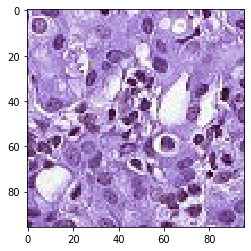

In [13]:
input_dir = '/Users/ACER/Desktop/hpc_dataset/'
training_dir = input_dir + 'train/'

for img in os.listdir(training_dir):
    img_array = cv2.imread(os.path.join(training_dir,img)) 
    plt.imshow(img_array,cmap="gray")#what is cmap?
    plt.show()
    break

In [14]:
def check_data():
    if os.path.isfile(config.p_path):
        print('Loading existing data for {} model'.format(config.mode))
        with open(config.p_path, 'rb') as handle:
            tmp = pickle.load(handle)
            return tmp
    else:
        return None

In [15]:
# Labels. source:Seth Adams
df = pd.read_csv('/Users/ACER/Desktop/hpc_dataset/train_labels.csv')
df.set_index('id', inplace=True)

X = []
y = []
classes = [0,1]

def build_training_data():
    for img in tqdm(os.listdir(training_dir)):
        img_array = cv2.imread(os.path.join(training_dir,img)) 
        img = img.replace('.tif','')
        label = df.at[img, 'label']
        X.append(img_array)
        y.append(classes.index(label))
        
    config.data = (X, y)    
    with open(config.p_path, 'wb') as handle:
        pickle.dump(config, handle, protocol=2)
    
    return X, y

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "C:\Users\ACER\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3331, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
KeyboardInterrupt

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\ACER\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 2044, in showtraceback
    stb = value._render_traceback_()
AttributeError: 'KeyboardInterrupt' object has no attribute '_render_traceback_'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\ACER\Anaconda3\lib\site-packages\IPython\core\ultratb.py", line 1151, in get_records
    return _fixed_getinnerframes(etb, number_of_lines_of_context, tb_offset)
  File "C:\Users\ACER\Anaconda3\lib\site-packages\IPython\core\ultratb.py", line 319, in wrapped
    return f(*args, **kwargs)
  File "C:\Users\ACER\Anaconda3\lib\si

KeyboardInterrupt: 

## Build VGG-16 Model

In [8]:
def VGG16_model():
    base_model = VGG16(include_top=False,
                       input_shape = (96,96,3),
                       weights = 'imagenet')
    model = Sequential()
    model.add(base_model)
    model.add(Flatten())
    model.add(Dense(256,activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(128,activation='sigmoid'))
    model.add(Dense(2,activation='softmax'))
    model.summary()
    model.compile(loss='categorical_crossentropy', 
                  optimizer=keras.optimizers.Adam(lr=0.001), 
                  metrics=['acc'] )
    return model

## Train the Network

In [11]:
config = Config(mode='hcd')

if config.mode == 'hcd':
    X, y = build_training_data()
    y_flat = np.argmax(y, axis=1) #return the index value
    model = VGG16_model()

class_weight = compute_class_weight('balanced', 
                                    np.unique(y_flat),
                                    y_flat)

checkpoint = ModelCheckpoint(config.model_path, monitor='val_acc', verbose=1, mode='max',
                             save_best_only=True, save_weights_only=False, period=1)

history = model.fit(X, y, epochs=3, batch_size=300, 
          shuffle=True, validation_split=0.1,
          callbacks = [checkpoint])

model.save(config.model_path)

  0%|▏                                   | 953/220025 [00:04<17:08, 213.06it/s]


KeyboardInterrupt: 